In [1]:
from __future__ import division, print_function, absolute_import, unicode_literals

#Re-Introduction to Machine Learning:
Classifying the Iris Dataset with K-Nearest Neighbors
========

#####Version 0.1

***
By AA Miller (Northwestern University, Adler Planetarium)


During the first session of the LSSTC DSFP we had an opportunity to work with unsupervised algorithms while clustering flowers in the famous iris data set. Here we will explore the use of the K-nearest neighbors algorithm to actually classify the flowers in the iris data set, while also re-familiarizing ourselves with [`scikit-learn`](http://scikit-learn.org/stable/).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/adamamiller/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


##Problem 1) Visualize the Iris Data Set

Before building the model, we visualize the iris data using [`Seaborn`](https://stanford.edu/~mwaskom/software/seaborn/index.html). As previously covered, `seaborn` can be really handy when visualizing $2 < N \lesssim 10$ -dimension data sets. 

As a reminder, the Iris data set measures 4 different features of 3 different types of Iris flowers. There are 150 different flowers in the data set.

*Note - for those familiar with `pandas` `seaborn` is designed to integrate easily and directly with `pandas DataFrame` objects. In the example below the Iris data are loaded into a `DataFrame`. `iPython` notebooks also display the `DataFrame` data in a nice readable format.*

In [4]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris

:0: FutureWarning: IPython widgets are experimental and may change in the future.


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


**Problem 1a** 

Can you identify anything interesting about the Iris data set in Table format?

**Solution 1a** 

The petal length and petal width for setosa and virginica clearly separate flowers belonging to those two classes.

The iris data set is (probably) best visualized using a `seaborn` pair plot, which shows the pair-wise distributions of all the features included in the data set.

*Recall - KDEs are (typically) better than histograms, and color, when used properly conveys a lot of information.*

Thus, we set `diag_kind = 'kde'` and color the data by class, using `hue = 'species'` in the `seaborn` pair plot

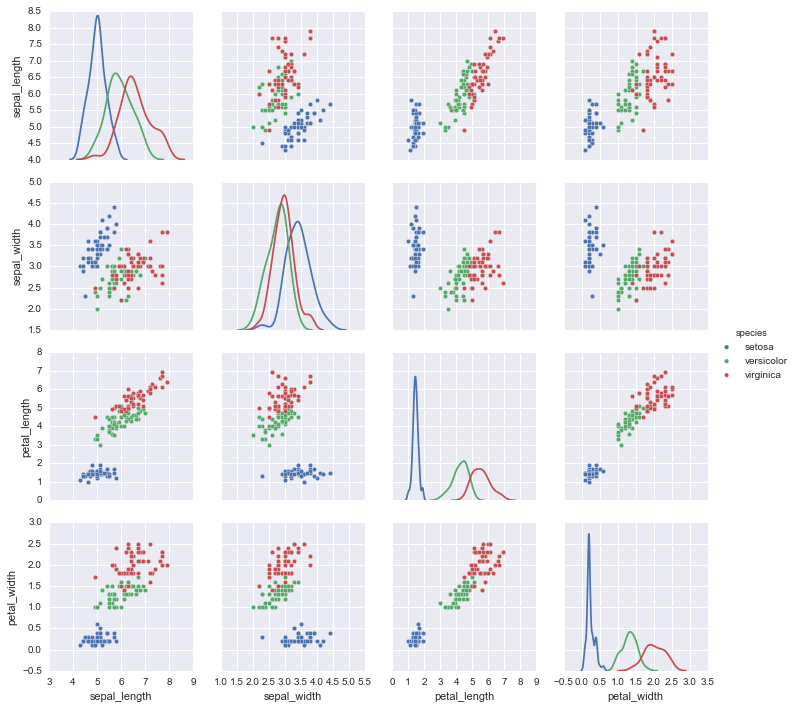

In [7]:
sns.set_style("darkgrid")
sns.pairplot(iris, vars = ["sepal_length", "sepal_width", "petal_length", "petal_width"],
             hue = "species", diag_kind = 'kde')

**Problem 1b** 

Based on the pair-plot, do you think iris classification will be easy or difficult?

**Solution 1b** 

The setosa class is clearly isolated from the other two in feature space, and as such, virtually all algorithms should be able to separate these from the other flowers. The virginica and versicolor classes, on the other hand, have a mild overlap in feature space, which may be difficult for some models.

Moving forward, in the interest of speed and clarity, we will compare our classification results to the correct class labels using 2D plots of sepal length vs. sepal width. 

We will also load the data as a `scikit-learn Bunch` which enables dictionary-like properties, and easy integration with all the `scikit-learn` algorithms. 

*Recall that the `scikit-learn Bunch` consists of several keys, of which we are primarily interested in the `data` and `target` information.*

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()

**Problem 1c** 

Make a scatter plot of sepal length vs. sepal width for the iris data set. Color the points by their respective iris type (i.e. labels).

In [ ]:
plt.scatter( # complete
plt.xlabel('sepal length')
plt.ylabel('sepal width')

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


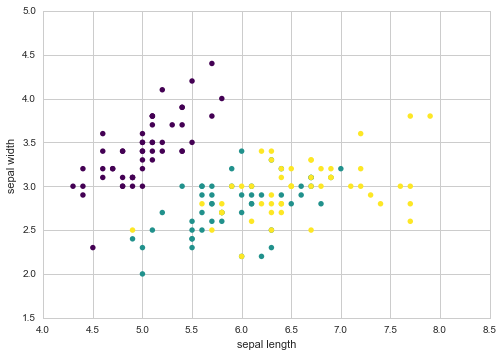

In [69]:
sns.set_style("whitegrid")
print(iris.feature_names)  # shows that sepal length is first feature and sepal width is second feature

plt.scatter(iris.data[:,0], iris.data[:,1], c = iris.target, s = 30, edgecolor = "None", cmap = "viridis")
plt.xlabel('sepal length')
plt.ylabel('sepal width')

##Problem 2) Supervised Machine Learning

Supervised machine learning aims to predict a target class or produce a regression result based on the location of labelled sources (i.e. the training set) in the multidimensional feature space. The "supervised" comes from the fact that we are specifying the allowed outputs from the model. Using the training set labels, we can estimate the accuracy of each model we generate. (though there are generally important caveats about generalization, which we will explore in further detail later).

We will begin with a simple, but nevertheless, elegant algorithm for classification and regression: [$k$-nearest-neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) ($k$NN). In brief, the classification or regression output is determined by examining the $k$ nearest neighbors in the training set, where $k$ is a user defined number. Typically, though not always, calculated distances are Euclidean, and the final classification is assigned to whichever class has a plurality within the $k$ nearest neighbors (in the case of regression, the average of the $k$ neighbors is the output from the model).

*Note - you should be worried about how to select the number $k$. We will re-visit this in further detail on Friday.*

In `scikit-learn` the [`KNeighborsClassifer`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) algorithm is implemented as part of the [`sklearn.neighbors`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors) module. 

        from sklearn.neighbors import KNeighborsClassifier
        KNNclf = KNeighborsClassifier()

See the docs to learn about the default options for `KNeighborsClassifer`.

**Problem 2a** 

Fit two different $k$NN models to the iris data, one with 3 neighbors and one with 10 neighbors. Plot the resulting class predictions in the sepal length-sepal width plane (same plot as above). 

How do the results compare to the true classifications? 

Is there any reason to be suspect of this procedure?

*Hint - recall that `sklearn` models are fit using the `.fit(X,y)` method, where `X` is the training data, or feature array, with shape `[n_samples, n_features]` and `y` is the targets, or label array, with shape `[n_samples]`.* 


*Hint 2 - after you have constructed the model, it is possible to obtain model predictions using the `.predict()` method, which requires a feature array, `Xpred`, using the same features and order as the training set, as input.*

*Hint 3 - (this isn't essential, but is worth thinking about) - should the features be re-scaled in any way?*

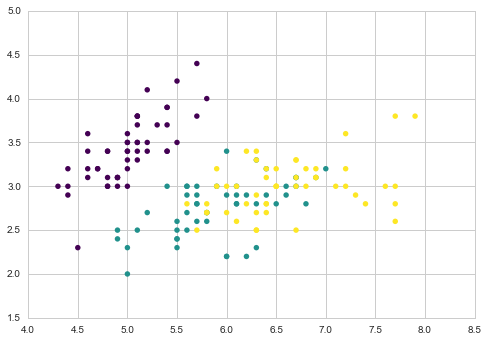

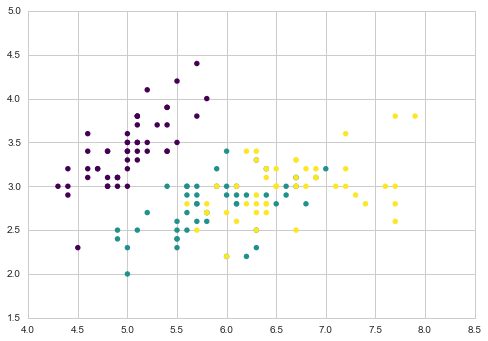

In [11]:
from sklearn.neighbors import KNeighborsClassifier

KNNclf = KNeighborsClassifier( # complete 
preds = # complete 
plt.figure()
plt.scatter( # complete 

KNNclf = KNeighborsClassifier( # complete 
preds = # complete 
plt.figure()
plt.scatter( # complete 

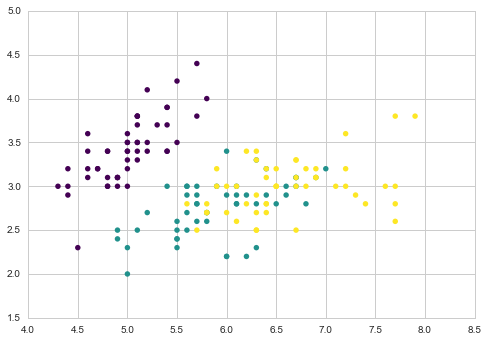

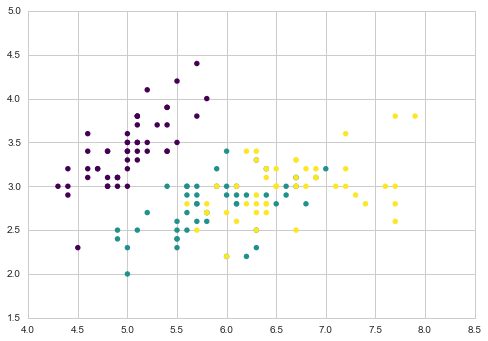

In [12]:
from sklearn.neighbors import KNeighborsClassifier

KNNclf = KNeighborsClassifier(n_neighbors = 3).fit(iris.data, iris.target)
preds = KNNclf.predict(iris.data)
plt.figure()
plt.scatter(iris.data[:,0], iris.data[:,1], 
            c = preds, cmap = "viridis", s = 30, edgecolor = "None")

KNNclf = KNeighborsClassifier(n_neighbors = 10).fit(iris.data, iris.target)
preds = KNNclf.predict(iris.data)
plt.figure()
plt.scatter(iris.data[:,0], iris.data[:,1], 
            c = preds, cmap = "viridis", s = 30, edgecolor = "None")

These results are almost identical to the training classifications. However, we have cheated! 

We are evaluating the accuracy of the model (98% in this case) using the same data that defines the model. Thus, what we have really evaluated here is the training error. 

The true test of a good model is the generalization error: how accurate are the model predictions on new data? 

We can approximate the generalization error (under the assumption that new observations are similar to the training set - an often poor assumption in astronomy...) via cross validation (CV). 

In brief, CV provides predictions for training set objects that are withheld from the model construction in order to avoid "double-dipping." The most common forms of CV iterate over all sources in the training set.

Using [`cross_val_predict`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html), we can obtain CV predictions for each source in the training set.

    from sklearn.model_selection import cross_val_predict
    CVpreds = cross_val_predict(sklearn.model(), X, y)

where `sklearn.model()` is the desired model, `X` is the feature array, and `y` is the label array.

*Hint - if you are running an old (< 0.18) version of `scikit-learn` you may need to run `conda update`.*

**Problem 2b**

Produce cross-validation predictions for the iris dataset and a $k$NN model with 5 neighbors. 

Plot the resulting classifications, as above, and estimate the accuracy of the model as applied to new data. 

How does this accuracy compare to a $k$NN model with 50 neighbors?

In [ ]:
from sklearn.model_selection import cross_val_predict

CVpreds = cross_val_predict(# complete
plt.figure()
plt.scatter( # complete
print("The accuracy of the kNN = 5 model is ~{:.4}".format( # complete

CVpreds50 = cross_val_predict( # complete

print("The accuracy of the kNN = 50 model is ~{:.4}".format( # complete

The accuracy of the kNN = 5 model is ~0.9867
The accuracy of the kNN = 50 model is ~0.8867


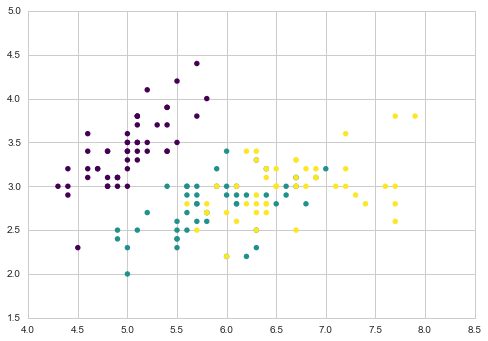

In [14]:
from sklearn.model_selection import cross_val_predict

CVpreds = cross_val_predict(KNeighborsClassifier(n_neighbors=5), iris.data, iris.target)
plt.figure()
plt.scatter(iris.data[:,0], iris.data[:,1], 
            c = preds, cmap = "viridis", s = 30, edgecolor = "None")
print("The accuracy of the kNN = 5 model is ~{:.4}".format( sum(CVpreds == iris.target)/len(CVpreds) ))

CVpreds50 = cross_val_predict(KNeighborsClassifier(n_neighbors=50), iris.data, iris.target)

print("The accuracy of the kNN = 50 model is ~{:.4}".format( sum(CVpreds50 == iris.target)/len(CVpreds50) ))

Wow! The 5-neighbor model only misclassifies 2 of the flowers via CV. The 50-neighbor model misclassifies 17 flowers. While this overall accuracy is still relatively high, it would be useful to understand which flowers are being misclassified.

**Problem 2c** 

Calculate the accuracy for each class in the iris set, as determined via CV for the $k$ = 50 model.

Which class is most accurate? Does this meet your expectations?

In [ ]:
# complete

In [70]:
for iris_type in range(3):
    iris_acc = sum( (CVpreds50 == iris_type) & (iris.target == iris_type)) / sum(iris.target == iris_type)

    print("The accuracy for the {:s} class is ~{:.4f}".format(iris.target_names[iris_type], iris_acc))

The accuracy for the setosa class is ~1.0000
The accuracy for the versicolor class is ~0.9200
The accuracy for the virginica class is ~0.7400


The classifier does a much better job classifying setosa and versicolor than it does for virginica. This is what we expected based on our previous visualization of the data set.

Measuring the accuracy for each class is useful, but there is greater utility in determining the full cross-class confusion for the model. We can visualize which sources are being mis-classified via a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix).

In a confusion matrix, one axis shows the true class and the other shows the predicted class. For a perfect classifier all of the power will be along the diagonal, while confusion is represented by off-diagonal signal. 

Fortunately, `scikit-learn` makes it easy to compute a confusion matrix. This can be accomplished with the following: 

    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)

**Problem 2d** 

Calculate the confusion matrix for the iris training set and the $k$NN = 50 model.

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix( # complete
print(cm)

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(iris.target, CVpreds50)
print(cm)

[[50  0  0]
 [ 1 46  3]
 [ 0 13 37]]


The confusion matrix reveals that most of the virginica misclassifications are predicted to be versicolor. The iris data set features 50 members of each class, but problems with class imbalance are more difficult to visualize in this way. Thus, sometimes it's helpful to normalize each value relative to the true number of sources.

Better still, we can visualize the confusion matrix in a readily digestible fashion. First - let's normalize the confusion matrix.

**Problem 2e** 

Calculate the normalized confusion matrix. Be careful, you have to sum along one axis, and then divide along the other. 

*Anti-hint: This operation is actually straightforward using some array manipulation that we have not covered up to this point. Thus, we have performed the necessary operations for you below. If you have extra time, you should try to develop an alternate way to arrive at the same normalization.*

In [18]:
normalized_cm = cm.astype('float')/cm.sum(axis = 1)[:,np.newaxis]

normalized_cm

array([[ 1.  ,  0.  ,  0.  ],
       [ 0.02,  0.92,  0.06],
       [ 0.  ,  0.26,  0.74]])

Normalization makes it easier to compare the classes when there is class imbalance. 

We can visualize the confusion matrix using `imshow()` within pyplot. A colorbar and axes labels will be needed.

**Problem 2f** 

Plot the confusion matrix. Be sure to label each axis.

*Hint - you might find the [`sklearn` confusion matrix tutorial](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#example-model-selection-plot-confusion-matrix-py) helpful for making a nice plot.*

In [ ]:
plt.imshow( # complete

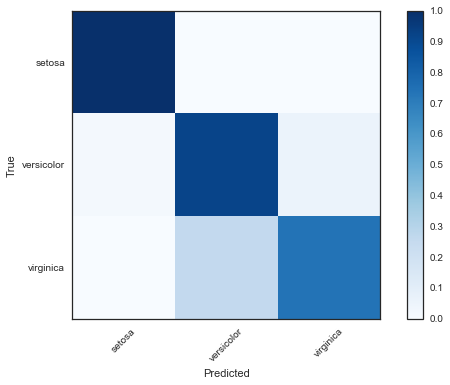

In [24]:
sns.set_style('white')
plt.imshow(normalized_cm, interpolation = 'nearest', cmap = 'Blues')

tick_marks = np.arange(len(iris.target_names))
plt.xticks(tick_marks, iris.target_names, rotation=45)
plt.yticks(tick_marks, iris.target_names)


plt.ylabel( 'True')
plt.xlabel( 'Predicted' )
plt.colorbar()
plt.tight_layout()

##Challenge Problem) ROC Curves

Earlier today we learned about [receiver operating characteristic (ROC) curves](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) as a means of measuring model performance. In brief, ROC curves plot the true positive rate (TPR) as a function of the false positive rate (FPR). Typically, the model that gets closest to TPR = 1 and FPR = 0 is considered best. 

Measuring TPR as a function of FPR requires classification probabilities, which are not typically available for $kNN$ models, but this is possible using `sklearn` (in brief, the probabilities are just the relative fraction of each class within the $k$ neighbors).

**Challenge Problem** 

Plot the ROC curve for each class in the iris data set using a $k = 50$ $kNN$ model and 10-fold cross validation predictions. Be sure to clearly label each of the curves.

*Hint 1 - ROC curves only work for 2 class problems. You need to create three 1 vs. all models in this case.* 

*Hint 2 - in `cross_val_predict` you'll want to set `method = 'predict_proba'` in order to return class probabilities.*

*Hint 3 - (`sklearn` to the rescue again!) [`sklearn.metrics.roc_curve`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) quickly calculates the FPR and TPR when given class labels and prediction probabilities.*

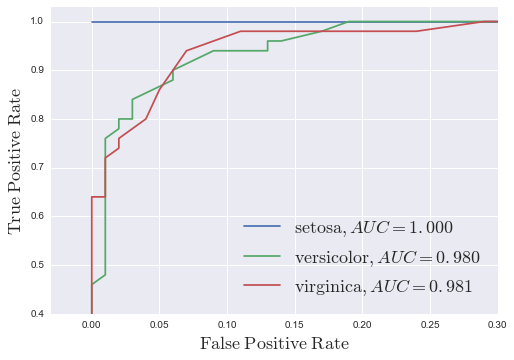

In [67]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

sns.set_style("darkgrid")
fig, ax = plt.subplots()
# loop over each iris type for 1 vs all classification
for iris_type in ['setosa', 'versicolor', 'virginica']:
    y_iris_type = np.zeros(len(iris.target), dtype = int)
    y_iris_type[np.where(iris.target == int(np.where(iris.target_names == iris_type)[0]))] = 1
    y_preds = cross_val_predict(KNeighborsClassifier(n_neighbors=50), iris.data, y_iris_type , 
                                 method = 'predict_proba', cv = 10)
    fpr, tpr, thresholds = roc_curve(y_iris_type, y_preds[:,1])
    auc = roc_auc_score(y_iris_type, y_preds[:,1])
    ax.plot(fpr, tpr, label = r'$\mathrm{{{:s}}}, AUC = {{{:.3f}}}$'.format(iris_type, auc))

ax.legend(loc = 4, fontsize = 18)
ax.set_xlim(-0.03, 0.3)
ax.set_ylim(0.4,1.03)
ax.set_xlabel(r'$\mathrm{False \; Positive \; Rate}$', fontsize = 18)
ax.set_ylabel(r'$\mathrm{True \; Positive \; Rate}$', fontsize = 18)